<a href="https://colab.research.google.com/github/ganbagal/GEN_AI_Assignments/blob/main/GEN_AI_Assignments_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python program to draw (visualize) the architecture of a **Neural Network** used to classify fraudulent and non-fraudulent credit card transactions.

Assume the fraud detection dataset contains the following input features:

1. Transaction Amount

2. Transaction Time

3. Merchant Category

4. Customer Age

5. Account Balance

6. Number Of Transactions Today

7. Fraud (0 = Genuine, 1 = Fraud)


In [11]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils  import plot_model

In [14]:
# Create Sample Dataset

data = {
        "TransactionAmount":[70000,1200,90000,2000,50000,1500],
        "TransactionTime":[2,16,1,10,23,14],
        "MerchantCategory":["Electronics","Grocery","Luxury","Grocery","Luxury","Grocery"],
        "CustomerAge":[50,28,60,35,45,30],
        "AccountBalance":[2000000,30000,3000000,50000,1000000,40000],
        "NumOfTransToday":[15,1,20,2,10,1],
        "Fraud":[0,1,0,1,0,1]
}
df = pd.DataFrame(data)



In [13]:


encoder = LabelEncoder()
df["MerchantCategory"] = encoder.fit_transform(df["MerchantCategory"])

X = df.drop("Fraud", axis=1)
y = df["Fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Build Nural Network

model = Sequential()

model.add(Dense(16,activation='relu',input_shape=(X_train.shape[1],)))

model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [22]:
# Compile Model :

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
# Train the model

history = model.fit(X_train,y_train,epochs=50,batch_size=2,validation_split=0.2,verbose=1)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.6111 - loss: 0.5579 - val_accuracy: 0.0000e+00 - val_loss: 0.7576
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6111 - loss: 0.5069 - val_accuracy: 0.0000e+00 - val_loss: 0.7472
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6111 - loss: 0.5275 - val_accuracy: 0.0000e+00 - val_loss: 0.7377
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6111 - loss: 0.4785 - val_accuracy: 0.0000e+00 - val_loss: 0.7283
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7778 - loss: 0.3908 - val_accuracy: 0.0000e+00 - val_loss: 0.7197
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7778 - loss: 0.3783 - val_accuracy: 0.0000e+00 - val_loss: 0.7101
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6111 - loss: 0.4764 - val_accuracy: 0.0000e+00 - val_loss: 0.6997
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6111 - loss: 0.4644 - val_accura

In [24]:
# Predictions :

y_pred = (model.predict(X_test) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [28]:
# Evaluation Metrics

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [29]:
# Texual Architecture View

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 516 (2.02 KB)

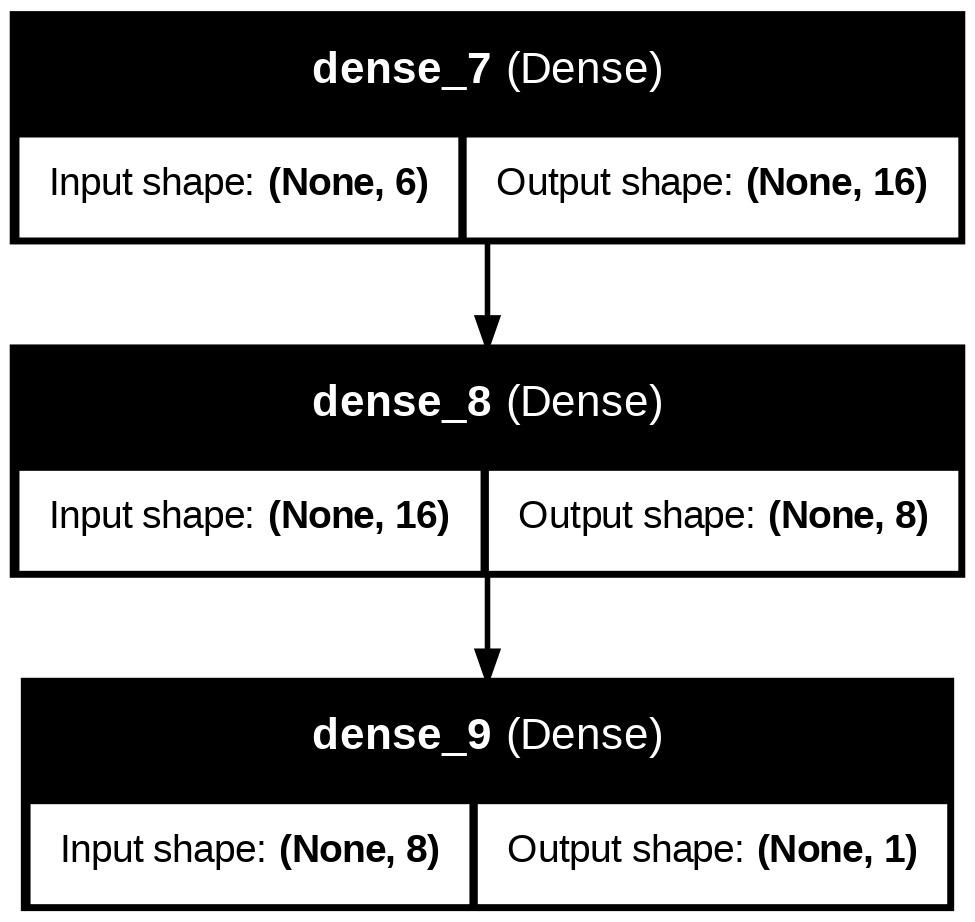

In [30]:
# Architecture Diagram

plot_model(model,show_shapes=True,show_layer_names=True)